In [1]:
# export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle,gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

# Load Data

In [2]:
MNIST_URL = 'http://deeplearning.net/data/mnist/mnist.pkl'

In [3]:
path = datasets.download_data(MNIST_URL, ext = '.gz')
path

PosixPath('/home/qiaolinhan/.fastai/data/mnist.pkl.gz')

In [4]:
# use standard library to open it
with gzip.open(path, 'rb') as f:
    ((x_train, y_train),(x_valid, y_valid), _) = pickle.load(f, encoding = 'latin-1')


In [5]:
# it contained numpy arraries, but numpy arries are not allowed in foundations, so convert them into tensors by Python map
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n, c =x_train.shape # number of rows, number of colums

In [6]:
import operator

In [7]:
from exp.nb_compare import *

In [8]:
# n should be equal to the shape of y
assert n==y_train.shape[0]

In [13]:
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 9)

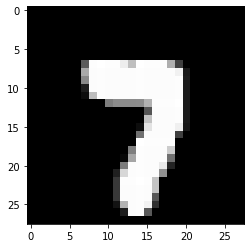

In [17]:
# plot it
mpl.rcParams['image.cmap'] = 'gray'
img = x_train[1231]
img.view(28, 28).type()
plt.imshow(img.view((28,28)))

# Create Linear Model
$y=ax+b$
where $a$ is a bunch of weights, so it need to be 784 by 10 matrix. And bias startwith 10 zeros.    
Because we got 784 going in and 10 going out.  



In [19]:
weights = torch.randn(784, 10)

In [20]:
bias = torch.zeros(10)

## Matrix Multiplication

In [21]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += a[i, k]*b[k, j]
    return c

In [22]:
m1 = x_valid[:5]
m2 = weights
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))